In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:


df = pd.read_csv('../data/solar-measurements_benin-malanville_qc.csv', encoding='ISO-8859-1')


df.head()  



C:\Users\bezat\AppData\Local\Temp\ipykernel_10088\2024560093.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/solar-measurements_benin-malanville_qc.csv', encoding='ISO-8859-1')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0,0,26.2,93.4,0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0,0,26.2,93.6,0,0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0,0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1,0,0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


In [25]:
df.describe(include='all')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525601,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,0.0
unique,525601,15225.0,13703.0,12542.0,17349.0,14980.0,485.0,1507,289.0,162.0,71.0,7063.0,1000.0,33.0,5.0,50.0,1266.0,1099.0,NaN
top,2022-08-09 00:00,-1.4,-0.4,-1.4,0.0,0.0,26.4,100,0.0,0.0,0.4,0.0,0.0,995.0,0.0,0.0,25.9,25.1,NaN
freq,1,13535.0,44888.0,13029.0,230681.0,231084.0,3658.0,1144,59932.0,56298.0,130873.0,56607.0,64714.0,79274.0,492384.0,489849.0,2845.0,2987.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

missing_report = df.isna().sum()

# Calculate the percentage of missing values
missing_percentage = (df.isna().sum() / len(df)) * 100

# Show columns with more than 5% missing values
missing_percentage[missing_percentage > 5]


Comments    100.0
dtype: float64

In [27]:
df.drop(columns=['Comments'], inplace=True)


In [ ]:

df.columns[df.columns.str.contains('GHI|DNI|DHI|Mod|WS')]


Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WSstdev', 'TModA',
       'TModB'],
      dtype='object')

In [ ]:


subset = df[cols].dropna()
z_scores = np.abs(stats.zscore(subset))
outliers = (z_scores > 3).any(axis=1)

print(f"Outlier rows detected: {outliers.sum()}")
df_clean = df.drop(subset.index[outliers])




Outlier rows detected: 7740


In [ ]:

df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())



In [35]:
df_clean.to_csv('../data/solar-measurements_benin-malanville_qc.csv', index=False)


In [38]:
print(df.describe())          # Before cleaning
print(df_clean.describe())    # After cleaning

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      228.883576       2.121113       2.809195  
std       316.536515       1.603466       2.029120  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.000000       1.300000  
50%         4.300000       1.900000       2.600000  
75%    

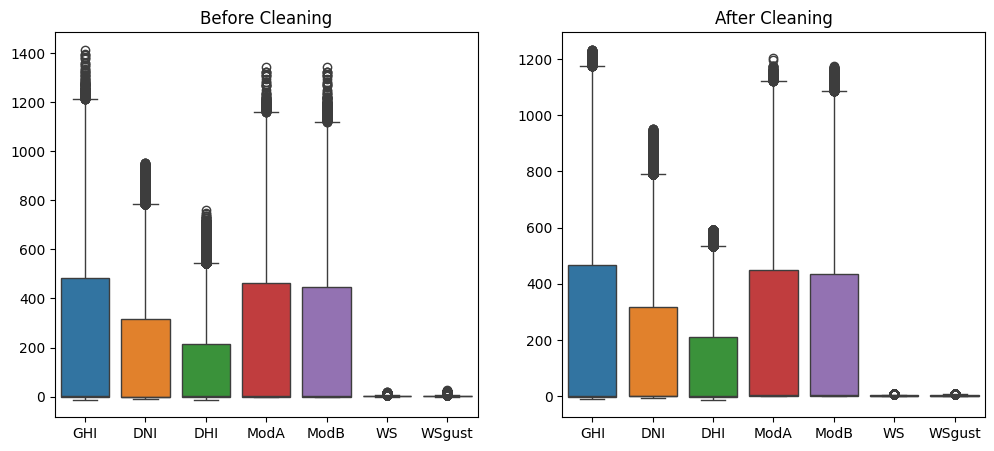

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df[cols], ax=axes[0])
axes[0].set_title('Before Cleaning')

sns.boxplot(data=df_clean[cols], ax=axes[1])
axes[1].set_title('After Cleaning')

plt.show()
